#### Q.6 Implement a Python program to f-it a Simple Linear Regression model to the following sample data: Plot the regression line over the data points

-  X = [1, 2, 3, 4, 5]
-  Y = [2.1, 4.3, 6.1, 7.9, 10.2]


In [21]:
# importing required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.linear_model import LinearRegression

In [22]:
reg =  LinearRegression()
reg

LinearRegression()

In [23]:
# Given data

x = [1, 2, 3, 4, 5]
y = [2.1, 4.3, 6.1, 7.9, 10.2]



In [24]:
# Since the given data is 1D ... need to  need to convert it into a 2D NumPy array 
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [25]:
reg.fit(x,y)

LinearRegression()

In [26]:
print(f'Coeffient : {reg.coef_}') 
print(f'Intercept : {reg.intercept_}')
print(f'Predicted value(Yhat) : {reg.predict(x)}')

Coeffient : [[1.98]]
Intercept : [0.18]
Predicted value(Yhat) : [[ 2.16]
 [ 4.14]
 [ 6.12]
 [ 8.1 ]
 [10.08]]


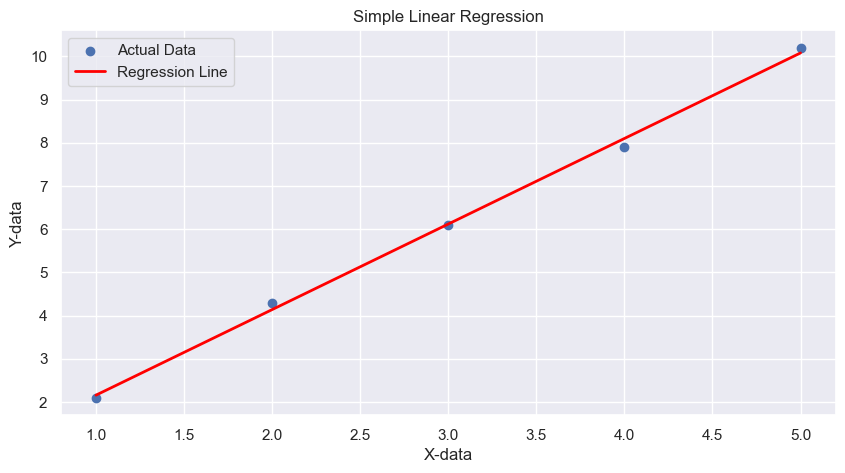

In [27]:
# Visualistion of data points with the regression  Line 

plt.figure(figsize=(10, 5))  # Start the figure first
plt.scatter(x, y, label='Actual Data')  # Scatter plot
plt.plot(x, reg.predict(x), color='red', linewidth=2, label='Regression Line')  # Regression line

plt.ylabel('Y-data')
plt.xlabel('X-data')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


#### Question 7:    Fit a Multiple Linear Regression model on this sample data: Check for multicollinearity using VIF and report the results. (Include your Python code and output in the code box below.)
- Area = [1200, 1500, 1800, 2000]
- Rooms = [2, 3, 3, 4]
- Price = [250000, 300000, 320000, 370000]


In [39]:
# importing required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Separating data into dependent variable (y) and independent variable 
# also Since the given data is 1D ... need to  need to convert it into a 2D NumPy array 

# Given data 
area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]
price = [250000, 300000, 320000, 370000]

X = np.column_stack((area, rooms))  
y = np.array(price)                 

model = LinearRegression()
model.fit(X, y) 


LinearRegression()

In [61]:
print(f'Coeffient : {model.coef_}') 
print(f'Intercept : {model.intercept_}')
print(f'Predicted value(Yhat) : {model.predict(X)}')

Coeffient : [   63.15789474 34736.84210526]
Intercept : 103157.8947368421
Predicted value(Yhat) : [248421.05263158 302105.26315789 321052.63157895 368421.05263158]


In [74]:
regression_area = LinearRegression()
regression_area.fit(area, y)
y_hat_area = regression_area.predict(area)

regression_rooms = LinearRegression()
regression_rooms.fit(rooms, y)
y_hat_rooms = regression_rooms.predict(rooms)


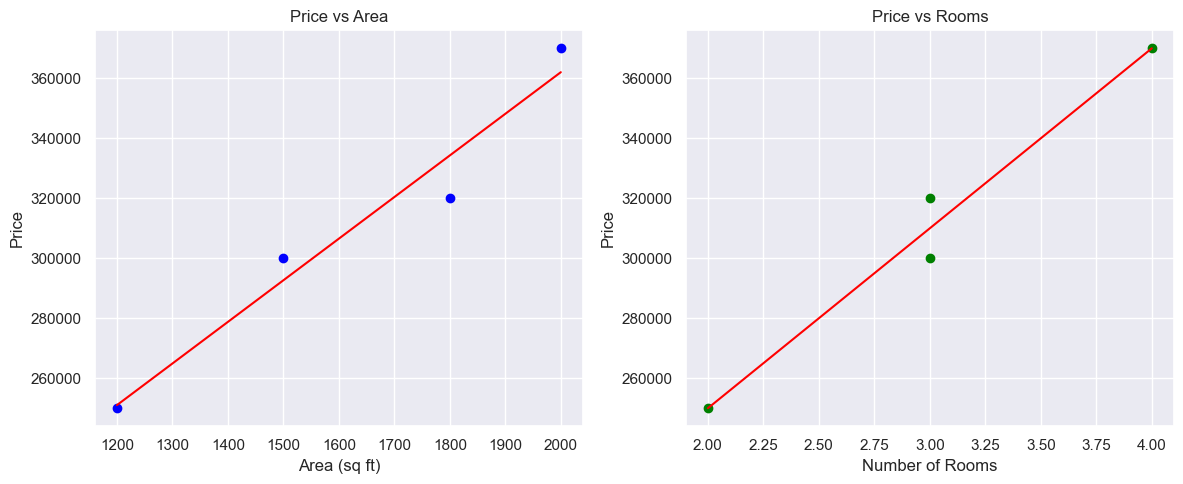

In [ ]:

# Plot Price vs Area
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(area, y, color='blue')
plt.plot(area, y_hat_area, color='red') 
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')

# Plot Price vs Rooms
plt.subplot(1, 2, 2)
plt.scatter(rooms, y, color='green')
plt.plot(rooms, y_hat_rooms, color='red') 
plt.title('Price vs Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


#### checking for multicollinarity

In [82]:
# Converting NumPy array X into a DataFrame
data = pd.DataFrame(X, columns=['Area', 'Rooms'])
data

,Area,Rooms
0,1200,2
1,1500,3
2,1800,3
3,2000,4


In [83]:
correlation_matrix = data.corr()
print(correlation_matrix)


           Area     Rooms
Area   1.000000  0.933139
Rooms  0.933139  1.000000


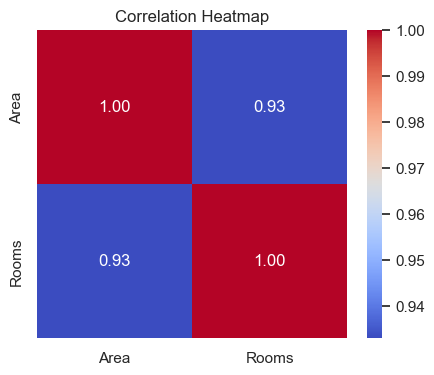

In [84]:

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### **Interpretsion** 
Based on the correlation heatmap, the correlation coefficient between Area and Rooms 
is approximately 0.93, indicating a strong positive linear relationship.
This suggests that as the area of a house increases, the number of rooms tends to increase as well.

Such a high correlation between independent variables is a sign of multicollinearity, 
which can negatively affect the stability and interpretability of the regression coefficients 
in a Multiple Linear Regression model.
Therefore, it's important to quantify this multicollinearity further using the Variance Inflation Factor (VIF).

In [85]:

# Required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Area','Rooms']]

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns


In [86]:
vif

,VIF,Features
0,127.796923,Area
1,127.796923,Rooms



#### **Interpretaion**
A VIF > 10 is generally considered a sign of high multicollinearity.

Here, both Area and Rooms have extremely high VIF values (~127.8), which means they are highly linearly dependent on each other.

This level of multicollinearity can:

Distort coefficient estimates in your regression model.

Make it difficult to interpret the individual effect of each feature.

Increase the variance of the estimated regression coefficients.



#### Question 8:     Implement polynomial regression on the following datam Fit a 2nd-degree polynomial and plot the resulting curve.  (Include your Python code and output in the code box below.)
- X = [1, 2, 3, 4, 5]
- Y = [2.2, 4.8, 7.5, 11.2, 14.7]


In [88]:
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transforming input for polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)



In [89]:
# Fitting the model
model = LinearRegression()
model.fit(X_poly, y)



LinearRegression()

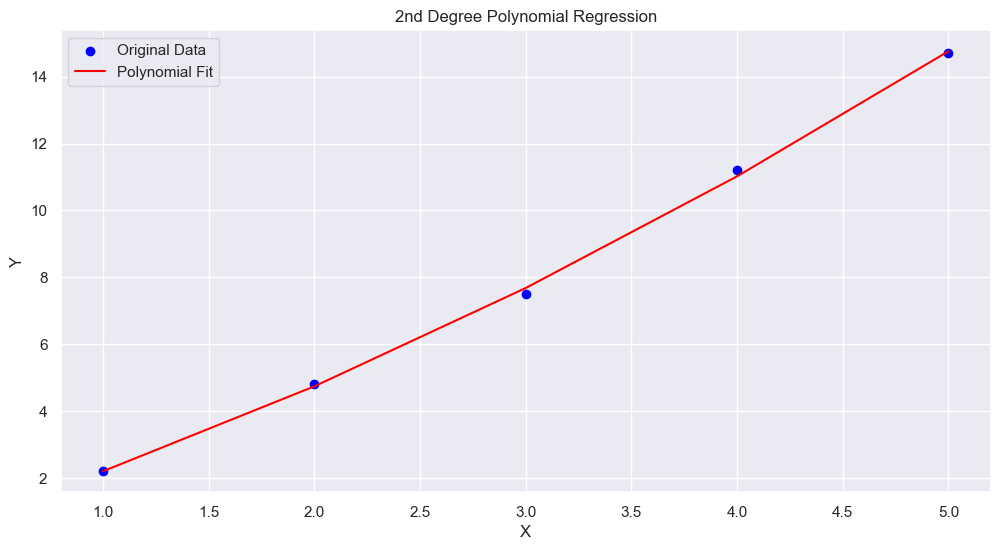

In [92]:

# Predict y_hat
y_hat = model.predict(X_poly)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_hat, color='red', label='Polynomial Fit')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


#### Question 9: Create a residuals plot for a regression model trained on this data: Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.)
Answer:

- X = [10, 20, 30, 40, 50]
- Y = [15, 35, 40, 50, 65]


In [94]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])


model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate error
residuals = Y - Y_pred


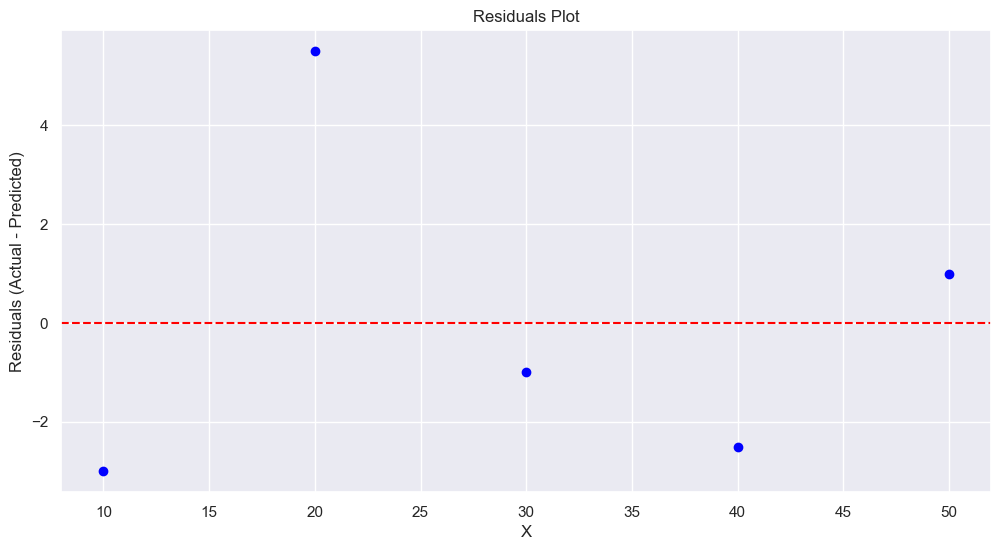

In [95]:

plt.figure(figsize=(12,6))
plt.scatter(X, residuals, color='blue', marker='o')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()



In [ ]:
|